In [1]:
%matplotlib inline
from __future__ import division
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import struct
import pickle
import pandas as pd
import random

In [3]:
import sys
sys.path.append('../../src')

In [4]:
from pylab import rcParams
from IPython.display import clear_output
rcParams['figure.figsize'] = 16, 8
pd.options.display.max_columns = 999

In [5]:
from microssembly2 import Microssembly
from price_generator import random_walk, random_price
from simple_strategy_cma import get_signal, loss_function, eval_individual, find_best_model, plot_trades, get_signal

In [6]:
def plot_signals(observed_signal, signal):
    df = pd.DataFrame({'true': observed_signal - 0.5, 'generated': signal - 0.5}, index=observed_signal.index)
    ax = df.plot.bar()
    my_xticks = ['Sell', 'Buy']
    ax.set_yticks([-1, 1])
    ax.set_yticklabels(my_xticks)
    ax.set_xticklabels([])

In [7]:
def get_strategy_signal(price, short_ma, long_ma, demo=False):
    long_ma = abs(int(long_ma))
    shares = 1

    try:
        ml = price.rolling(long_ma).mean()

        buy = (ml > price) & (ml.shift() < price.shift())  # ma cross up
        sell = (ml < price) & (ml.shift() > price.shift())  # ma cross down
        signal = pd.Series(index=price.index)
        signal[buy[buy != False].index] = shares
        signal[sell[sell != False].index] = 0
    except Exception as e:
        print('Long {} Short {}'.format(long_ma, short_ma))
        raise e

    if demo is True:
        ax = price.plot()
        ml.plot()
        plt.legend(['price', 'Long MA'], loc='best')
        ax.xaxis.grid(True, which='minor', linestyle='-', linewidth=0.25)

    return signal

def get_strategy_signal_1(price):
    return get_strategy_signal(price, 2, 8, False)

((128,), (36,), 2007-12-17    0.0
 2007-12-19    1.0
 2007-12-21    0.0
 2007-12-28    1.0
 2007-12-29    0.0
 dtype: float64)

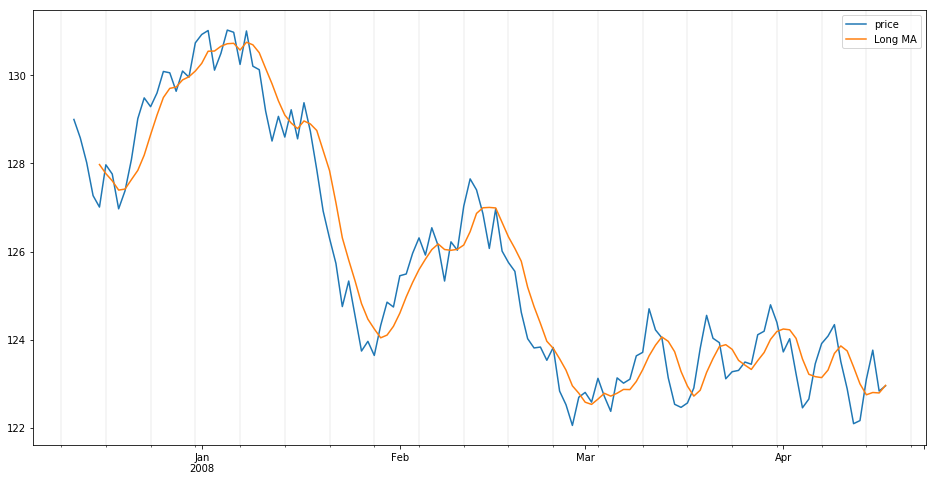

In [8]:
price = random_price()
signal = get_strategy_signal(price, 2, 5, True)
price.shape, signal.dropna().shape, signal.dropna()[:5]

In [9]:
best_code = find_best_model(get_strategy_signal_1,
                              ngen=3000,
                              pop_size=1000,                              
                              ind_size=100,
                              sigma=1e-2)

gen	nevals	avg	sig/noise	std	max
0  	1000  	0  	nan      	0  	0  
1  	1000  	0  	nan      	0  	0  
2  	1000  	0  	nan      	0  	0  
3  	1000  	0.000102798	0.0316386	0.00324915	0.102798
4  	1000  	0          	nan      	0         	0       
5  	1000  	0.000197938	0.0437647	0.00452278	0.12024 
6  	1000  	0          	nan      	0         	0       
7  	1000  	0.000563525	0.0465771	0.0120988 	0.351002
8  	1000  	0          	nan      	0         	0       
9  	1000  	0.000157895	0.0316386	0.00499057	0.157895
10 	1000  	0          	nan      	0         	0       
11 	1000  	0.000131004	0.0316386	0.00414065	0.131004
12 	1000  	0          	nan      	0         	0       
13 	1000  	0          	nan      	0         	0       
14 	1000  	0          	nan      	0         	0       
15 	1000  	7.72787e-05	0.0316386	0.00244255	0.0772787
16 	1000  	0          	nan      	0         	0        
17 	1000  	2.97095e-05	0.0316386	0.000939027	0.0297095
18 	1000  	0          	nan      	0          	0        
19 	1000  	0  

151	1000  	0          	nan      	0          	0        
152	1000  	0.000131868	0.0316386	0.00416795 	0.131868 
153	1000  	0          	nan      	0          	0        
154	1000  	0          	nan      	0          	0        
155	1000  	0          	nan      	0          	0        
156	1000  	0          	nan      	0          	0        
157	1000  	0.000165275	0.0316386	0.00522386 	0.165275 
158	1000  	0          	nan      	0          	0        
159	1000  	0          	nan      	0          	0        
160	1000  	0          	nan      	0          	0        
161	1000  	0          	nan      	0          	0        
162	1000  	0          	nan      	0          	0        
163	1000  	0          	nan      	0          	0        
164	1000  	0          	nan      	0          	0        
165	1000  	0          	nan      	0          	0        
166	1000  	0          	nan      	0          	0        
167	1000  	0          	nan      	0          	0        
168	1000  	0          	nan      	0          	0        
169	1000  

300	1000  	0.0022595  	0.108406 	0.0208429  	0.278422 
301	1000  	0.00265533 	0.128046 	0.0207373  	0.333258 
302	1000  	0.00349404 	0.156741 	0.0222919  	0.25307  
303	1000  	0.00547833 	0.151434 	0.0361763  	0.428135 
304	1000  	0.00591254 	0.166115 	0.0355929  	0.519335 
305	1000  	0.00494008 	0.167605 	0.0294746  	0.315165 
306	1000  	0.00641663 	0.186443 	0.0344161  	0.363162 
307	1000  	0.00768401 	0.197505 	0.0389054  	0.426156 
308	1000  	0.00701899 	0.215947 	0.0325033  	0.443735 
309	1000  	0.012099   	0.263069 	0.0459917  	0.458015 
310	1000  	0.0130741  	0.274418 	0.047643   	0.384146 
311	1000  	0.0125817  	0.251954 	0.0499363  	0.481928 
312	1000  	0.0114657  	0.268195 	0.0427514  	0.359807 
313	1000  	0.0157001  	0.290261 	0.0540897  	0.532947 
314	1000  	0.016649   	0.307532 	0.0541374  	0.425373 
315	1000  	0.0239551  	0.376396 	0.0636432  	0.450292 
316	1000  	0.0169336  	0.324468 	0.0521889  	0.469466 
317	1000  	0.0202538  	0.334007 	0.060639   	0.476544 
318	1000  

449	1000  	0.315511   	1.4524   	0.217234   	0.644398 
450	1000  	0.351525   	1.72442  	0.203852   	0.636656 
451	1000  	0.340682   	1.64034  	0.20769    	0.646003 
452	1000  	0.33446    	1.58683  	0.210772   	0.628402 
453	1000  	0.307592   	1.39973  	0.219751   	0.617899 
454	1000  	0.299416   	1.32769  	0.225516   	0.629313 
455	1000  	0.277841   	1.21036  	0.229552   	0.641679 
456	1000  	0.298284   	1.31361  	0.227073   	0.665025 
457	1000  	0.263201   	1.12369  	0.234228   	0.681298 
458	1000  	0.223954   	0.961501 	0.232921   	0.650658 
459	1000  	0.195431   	0.851968 	0.229388   	0.645045 
460	1000  	0.175976   	0.785501 	0.22403    	0.653178 
461	1000  	0.185714   	0.821042 	0.226193   	0.658839 
462	1000  	0.153353   	0.708682 	0.216392   	0.660768 
463	1000  	0.174191   	0.788782 	0.220835   	0.657048 
464	1000  	0.171834   	0.764935 	0.224639   	0.630573 
465	1000  	0.160418   	0.746064 	0.215019   	0.643745 
466	1000  	0.180391   	0.801378 	0.225101   	0.648084 
467	1000  

598	1000  	0.481175   	3.46533  	0.138854   	0.653714 
599	1000  	0.466889   	2.89487  	0.161281   	0.64443  
600	1000  	0.456464   	2.74879  	0.16606    	0.648429 
601	1000  	0.461426   	2.77156  	0.166486   	0.712782 
602	1000  	0.465172   	2.88982  	0.160969   	0.653671 
603	1000  	0.444223   	2.48153  	0.179012   	0.653671 
604	1000  	0.432675   	2.25204  	0.192126   	0.659093 
605	1000  	0.459479   	2.72392  	0.168683   	0.69821  
606	1000  	0.472498   	3.07755  	0.153531   	0.69821  
607	1000  	0.457497   	2.70008  	0.169438   	0.656448 
608	1000  	0.453468   	2.62187  	0.172956   	0.685547 
609	1000  	0.439078   	2.27663  	0.192863   	0.69821  
610	1000  	0.434179   	2.23258  	0.194474   	0.685547 
611	1000  	0.468345   	2.87657  	0.162814   	0.673772 
612	1000  	0.452936   	2.58529  	0.175197   	0.658537 
613	1000  	0.465265   	2.80299  	0.165989   	0.685547 
614	1000  	0.472108   	2.84025  	0.166221   	0.688813 
615	1000  	0.459215   	2.62216  	0.175129   	0.688813 
616	1000  

747	1000  	0.50858    	5.3522   	0.0950226  	0.653534 
748	1000  	0.506203   	5.07045  	0.099834   	0.653534 
749	1000  	0.508091   	5.41024  	0.0939127  	0.66     
750	1000  	0.513924   	5.60304  	0.0917224  	0.673251 
751	1000  	0.506143   	4.63425  	0.109218   	0.673251 
752	1000  	0.487448   	3.50898  	0.138914   	0.66217  
753	1000  	0.480383   	3.43378  	0.139899   	0.673251 
754	1000  	0.485223   	3.42912  	0.141501   	0.673251 
755	1000  	0.467504   	2.94158  	0.15893    	0.66217  
756	1000  	0.468349   	2.89784  	0.16162    	0.647577 
757	1000  	0.469393   	2.9683   	0.158135   	0.661986 
758	1000  	0.462269   	2.78753  	0.165834   	0.684169 
759	1000  	0.458452   	2.68183  	0.170947   	0.653266 
760	1000  	0.438881   	2.3297   	0.188385   	0.675284 
761	1000  	0.426304   	2.14129  	0.199087   	0.675284 
762	1000  	0.45255    	2.52593  	0.179162   	0.675284 
763	1000  	0.44735    	2.47913  	0.180446   	0.675284 
764	1000  	0.448718   	2.49463  	0.179873   	0.661986 
765	1000  

896	1000  	0.520112   	9.50798  	0.0547027  	0.65479  
897	1000  	0.522378   	9.82491  	0.0531687  	0.641221 
898	1000  	0.519734   	9.38656  	0.05537    	0.65479  
899	1000  	0.516041   	8.88029  	0.0581109  	0.641221 
900	1000  	0.520806   	9.84493  	0.052901   	0.68956  
901	1000  	0.520386   	8.57404  	0.0606932  	0.68956  
902	1000  	0.517701   	8.52648  	0.0607169  	0.68956  
903	1000  	0.520602   	9.48233  	0.0549023  	0.68956  
904	1000  	0.52378    	8.83258  	0.0593009  	0.676991 
905	1000  	0.520432   	9.80992  	0.0530516  	0.68956  
906	1000  	0.520405   	9.31525  	0.0558659  	0.68956  
907	1000  	0.526909   	9.72958  	0.0541554  	0.682627 
908	1000  	0.525133   	9.28355  	0.056566   	0.682627 
909	1000  	0.524302   	9.5347   	0.0549888  	0.682627 
910	1000  	0.525093   	9.91271  	0.0529717  	0.676025 
911	1000  	0.526921   	9.50716  	0.0554236  	0.682627 
912	1000  	0.522792   	9.16098  	0.0570672  	0.682627 
913	1000  	0.522201   	9.49768  	0.0549819  	0.676025 
914	1000  

1045	1000  	0.51689    	6.52243  	0.0792482  	0.685327 
1046	1000  	0.518823   	6.9613   	0.0745296  	0.685327 
1047	1000  	0.519748   	7.39154  	0.0703165  	0.685327 
1048	1000  	0.516823   	6.44855  	0.0801455  	0.685327 
1049	1000  	0.518193   	6.76693  	0.0765772  	0.685327 
1050	1000  	0.514724   	6.22042  	0.0827475  	0.685327 
1051	1000  	0.515148   	7.43446  	0.0692919  	0.665992 
1052	1000  	0.510122   	5.55549  	0.0918231  	0.665992 
1053	1000  	0.512032   	6.42374  	0.0797093  	0.665992 
1054	1000  	0.505929   	5.53614  	0.0913867  	0.665992 
1055	1000  	0.515507   	6.98123  	0.0738419  	0.682658 
1056	1000  	0.505362   	5.3012   	0.0953297  	0.682658 
1057	1000  	0.514274   	5.98784  	0.0858864  	0.682658 
1058	1000  	0.50333    	5.05483  	0.0995741  	0.673492 
1059	1000  	0.507311   	4.99239  	0.101617   	0.682658 
1060	1000  	0.506161   	5.42809  	0.0932484  	0.662858 
1061	1000  	0.506916   	5.50778  	0.0920364  	0.673492 
1062	1000  	0.507008   	5.71001  	0.0887928  	0.

1192	1000  	0.514696   	6.97181  	0.0738254  	0.680429 
1193	1000  	0.516368   	7.35178  	0.0702371  	0.67402  
1194	1000  	0.517793   	7.22641  	0.0716528  	0.683728 
1195	1000  	0.518304   	7.91568  	0.0654782  	0.67402  
1196	1000  	0.518668   	7.18975  	0.0721399  	0.683728 
1197	1000  	0.519832   	8.60791  	0.06039    	0.683728 
1198	1000  	0.51824    	7.78834  	0.0665405  	0.683728 
1199	1000  	0.516659   	8.78574  	0.0588066  	0.649158 
1200	1000  	0.518486   	8.92938  	0.0580652  	0.683728 
1201	1000  	0.517517   	9.2224   	0.0561152  	0.659083 
1202	1000  	0.520435   	9.73804  	0.0534435  	0.659083 
1203	1000  	0.517345   	8.17176  	0.0633089  	0.659083 
1204	1000  	0.522136   	9.71847  	0.0537262  	0.659083 
1205	1000  	0.518938   	8.84164  	0.0586925  	0.659083 
1206	1000  	0.521378   	9.09679  	0.0573145  	0.657146 
1207	1000  	0.520044   	9.90634  	0.0524961  	0.654679 
1208	1000  	0.523441   	9.47471  	0.0552461  	0.661626 
1209	1000  	0.520432   	9.55391  	0.0544732  	0.

1339	1000  	0.52127    	8.69086  	0.0599791  	0.66948  
1340	1000  	0.521656   	9.63449  	0.0541447  	0.66948  
1341	1000  	0.520483   	9.54665  	0.05452    	0.66948  
1342	1000  	0.520761   	8.98798  	0.0579397  	0.66948  
1343	1000  	0.517081   	9.27162  	0.0557703  	0.656335 
1344	1000  	0.519691   	8.71829  	0.0596093  	0.66948  
1345	1000  	0.523703   	10.0216  	0.0522573  	0.654545 
1346	1000  	0.523633   	9.27143  	0.0564781  	0.665962 
1347	1000  	0.523809   	9.97135  	0.0525315  	0.665962 
1348	1000  	0.524404   	9.01938  	0.058142   	0.666573 
1349	1000  	0.52392    	9.33555  	0.056121   	0.666573 
1350	1000  	0.525857   	9.92995  	0.0529567  	0.687708 
1351	1000  	0.520589   	8.90909  	0.0584335  	0.687708 
1352	1000  	0.521238   	9.09632  	0.0573021  	0.666573 
1353	1000  	0.521017   	9.51401  	0.0547631  	0.687708 
1354	1000  	0.520725   	8.55993  	0.0608329  	0.687708 
1355	1000  	0.520814   	8.15483  	0.0638657  	0.687708 
1356	1000  	0.522321   	9.39326  	0.0556059  	0.

1486	1000  	0.522445   	10.0868  	0.051795   	0.726682 
1487	1000  	0.523482   	9.76499  	0.053608   	0.726682 
1488	1000  	0.524044   	9.35136  	0.0560393  	0.726682 
1489	1000  	0.521147   	9.11856  	0.0571523  	0.659649 
1490	1000  	0.520838   	9.58969  	0.0543123  	0.656186 
1491	1000  	0.524661   	9.80269  	0.0535221  	0.659649 
1492	1000  	0.524974   	9.77319  	0.0537157  	0.660189 
1493	1000  	0.523449   	9.57979  	0.0546409  	0.675018 
1494	1000  	0.523856   	9.68355  	0.0540975  	0.67932  
1495	1000  	0.52247    	9.81755  	0.053218   	0.67932  
1496	1000  	0.523919   	9.71301  	0.0539399  	0.67932  
1497	1000  	0.523063   	9.35161  	0.0559329  	0.675018 
1498	1000  	0.518941   	9.18868  	0.0564761  	0.67932  
1499	1000  	0.522757   	9.92741  	0.0526579  	0.67932  
1500	1000  	0.52139    	9.99153  	0.0521832  	0.67932  
1501	1000  	0.519231   	9.35095  	0.0555271  	0.645045 
1502	1000  	0.51988    	9.8674   	0.0526867  	0.645161 
1503	1000  	0.521355   	10.5203  	0.0495573  	0.

1633	1000  	0.520339   	7.72941  	0.0673194  	0.683324 
1634	1000  	0.519755   	8.21937  	0.0632353  	0.66179  
1635	1000  	0.520858   	8.16424  	0.0637975  	0.678222 
1636	1000  	0.518649   	8.49358  	0.0610637  	0.678222 
1637	1000  	0.519822   	9.11888  	0.057005   	0.678222 
1638	1000  	0.520726   	8.87791  	0.0586541  	0.657108 
1639	1000  	0.519796   	8.24561  	0.0630391  	0.678222 
1640	1000  	0.521676   	8.4906   	0.0614415  	0.678222 
1641	1000  	0.519406   	7.83158  	0.066322   	0.678222 
1642	1000  	0.523042   	8.59334  	0.0608659  	0.678222 
1643	1000  	0.522753   	8.30778  	0.0629233  	0.65975  
1644	1000  	0.522605   	9.01321  	0.0579821  	0.657108 
1645	1000  	0.524442   	9.77441  	0.0536546  	0.65975  
1646	1000  	0.522689   	9.23307  	0.0566105  	0.65975  
1647	1000  	0.520817   	9.54421  	0.0545688  	0.656136 
1648	1000  	0.519185   	9.14792  	0.0567545  	0.65975  
1649	1000  	0.517777   	9.2111   	0.0562123  	0.656136 
1650	1000  	0.520519   	10.1231  	0.0514188  	0.

1780	1000  	0.501131   	4.42598  	0.113225   	0.664915 
1781	1000  	0.500162   	4.26936  	0.117152   	0.664915 
1782	1000  	0.503127   	4.38443  	0.114753   	0.679331 
1783	1000  	0.506525   	4.76567  	0.106286   	0.679331 
1784	1000  	0.51117    	5.65324  	0.0904207  	0.664915 
1785	1000  	0.511955   	5.41352  	0.0945698  	0.664915 
1786	1000  	0.502066   	4.31875  	0.116253   	0.653004 
1787	1000  	0.504044   	4.44712  	0.113342   	0.664915 
1788	1000  	0.509166   	5.19584  	0.0979951  	0.671429 
1789	1000  	0.510375   	5.49937  	0.092806   	0.664915 
1790	1000  	0.50803    	4.71077  	0.107844   	0.671429 
1791	1000  	0.517715   	6.36285  	0.0813652  	0.653004 
1792	1000  	0.513411   	5.72853  	0.0896236  	0.671429 
1793	1000  	0.519757   	6.73802  	0.0771379  	0.671429 
1794	1000  	0.508325   	5.01312  	0.101399   	0.653004 
1795	1000  	0.50778    	4.77021  	0.106448   	0.653004 
1796	1000  	0.496657   	4.00978  	0.123861   	0.671429 
1797	1000  	0.493754   	3.83436  	0.128771   	0.

1927	1000  	0.519765   	8.17736  	0.0635615  	0.666123 
1928	1000  	0.519091   	9.71738  	0.0534188  	0.660191 
1929	1000  	0.520217   	8.28622  	0.062781   	0.667716 
1930	1000  	0.522829   	10.0066  	0.0522482  	0.667716 
1931	1000  	0.522336   	9.43267  	0.0553752  	0.667716 
1932	1000  	0.519802   	9.08673  	0.0572046  	0.660191 
1933	1000  	0.521545   	8.8416   	0.0589876  	0.670011 
1934	1000  	0.519545   	8.57176  	0.0606112  	0.670011 
1935	1000  	0.521832   	10.003   	0.0521675  	0.667716 
1936	1000  	0.521546   	8.81366  	0.0591747  	0.669067 
1937	1000  	0.519564   	8.89295  	0.0584243  	0.670011 
1938	1000  	0.521359   	8.99192  	0.0579808  	0.670011 
1939	1000  	0.522513   	9.51006  	0.0549432  	0.662228 
1940	1000  	0.52031    	7.80829  	0.0666356  	0.670011 
1941	1000  	0.519601   	8.52765  	0.0609314  	0.669067 
1942	1000  	0.520954   	8.32157  	0.0626028  	0.670738 
1943	1000  	0.520583   	8.40838  	0.0619124  	0.670738 
1944	1000  	0.522817   	9.69859  	0.0539066  	0.

2074	1000  	0.510201   	6.10966  	0.0835072  	0.663317 
2075	1000  	0.512419   	6.31101  	0.0811944  	0.664157 
2076	1000  	0.514687   	6.66869  	0.0771796  	0.664157 
2077	1000  	0.509413   	5.70656  	0.0892679  	0.653753 
2078	1000  	0.507514   	5.58717  	0.0908356  	0.663317 
2079	1000  	0.510201   	5.67329  	0.0899303  	0.664157 
2080	1000  	0.504981   	4.81596  	0.104856   	0.664157 
2081	1000  	0.504732   	4.74667  	0.106334   	0.664157 
2082	1000  	0.502646   	4.42352  	0.11363    	0.664157 
2083	1000  	0.504978   	4.76523  	0.105971   	0.660191 
2084	1000  	0.507076   	5.52865  	0.0917179  	0.658537 
2085	1000  	0.499276   	4.22959  	0.118044   	0.663317 
2086	1000  	0.508942   	5.36927  	0.0947879  	0.671233 
2087	1000  	0.510967   	5.35331  	0.0954488  	0.671233 
2088	1000  	0.508976   	5.21869  	0.0975294  	0.660191 
2089	1000  	0.507984   	5.1329   	0.0989662  	0.661527 
2090	1000  	0.511442   	5.42059  	0.0943517  	0.678085 
2091	1000  	0.501813   	4.83789  	0.103725   	0.

2221	1000  	0.466691   	2.79992  	0.16668    	0.648685 
2222	1000  	0.487459   	3.71398  	0.13125    	0.674055 
2223	1000  	0.488136   	3.51494  	0.138875   	0.648685 
2224	1000  	0.485236   	3.52555  	0.137634   	0.666123 
2225	1000  	0.490791   	3.81858  	0.128527   	0.666123 
2226	1000  	0.493206   	3.98695  	0.123705   	0.707483 
2227	1000  	0.497877   	4.04766  	0.123004   	0.680756 
2228	1000  	0.477706   	3.22466  	0.148141   	0.707483 
2229	1000  	0.499978   	4.35157  	0.114896   	0.680756 
2230	1000  	0.490223   	3.739    	0.131111   	0.707483 
2231	1000  	0.491607   	3.69878  	0.132911   	0.65975  
2232	1000  	0.482549   	3.43586  	0.140445   	0.707483 
2233	1000  	0.489476   	3.6799   	0.133013   	0.680756 
2234	1000  	0.484233   	3.403    	0.142296   	0.677773 
2235	1000  	0.492112   	3.81944  	0.128844   	0.707483 
2236	1000  	0.500348   	4.59294  	0.108938   	0.707483 
2237	1000  	0.496707   	4.03513  	0.123096   	0.680756 
2238	1000  	0.500553   	4.48503  	0.111605   	0.

2368	1000  	0.520822   	9.05237  	0.0575343  	0.696325 
2369	1000  	0.523554   	9.31797  	0.0561876  	0.669829 
2370	1000  	0.521306   	9.21732  	0.0565572  	0.696325 
2371	1000  	0.522355   	8.95342  	0.0583414  	0.673317 
2372	1000  	0.521438   	9.53278  	0.0546994  	0.657534 
2373	1000  	0.520692   	8.85181  	0.0588232  	0.673317 
2374	1000  	0.520815   	9.03928  	0.0576168  	0.666195 
2375	1000  	0.519628   	8.95281  	0.0580408  	0.655462 
2376	1000  	0.522967   	8.85667  	0.0590478  	0.666195 
2377	1000  	0.520803   	8.90434  	0.0584887  	0.655462 
2378	1000  	0.522808   	9.5892   	0.0545205  	0.657534 
2379	1000  	0.520359   	9.0764   	0.057331   	0.655141 
2380	1000  	0.522552   	9.16829  	0.0569956  	0.66426  
2381	1000  	0.521587   	9.40187  	0.0554769  	0.657534 
2382	1000  	0.521069   	8.50261  	0.0612834  	0.657534 
2383	1000  	0.520659   	8.56418  	0.0607949  	0.655141 
2384	1000  	0.522214   	8.02625  	0.0650633  	0.66426  
2385	1000  	0.5211     	8.86595  	0.0587754  	0.

2515	1000  	0.520636   	9.36732  	0.0555801  	0.654056 
2516	1000  	0.521447   	8.83586  	0.0590149  	0.658553 
2517	1000  	0.51686    	8.96581  	0.0576479  	0.663703 
2518	1000  	0.522889   	9.61618  	0.054376   	0.689373 
2519	1000  	0.520121   	8.52732  	0.0609947  	0.658553 
2520	1000  	0.519569   	9.08017  	0.0572202  	0.7109   
2521	1000  	0.52068    	8.40322  	0.061962   	0.663355 
2522	1000  	0.521825   	8.74818  	0.0596495  	0.689373 
2523	1000  	0.51833    	9.01979  	0.0574658  	0.7109   
2524	1000  	0.524522   	9.51963  	0.055099   	0.658553 
2525	1000  	0.519631   	8.4931   	0.0611828  	0.7109   
2526	1000  	0.520162   	9.14094  	0.0569046  	0.649556 
2527	1000  	0.521316   	8.65596  	0.0602263  	0.7109   
2528	1000  	0.518895   	8.00725  	0.0648031  	0.7109   
2529	1000  	0.521673   	9.31461  	0.0560059  	0.657108 
2530	1000  	0.518445   	7.7775   	0.0666596  	0.7109   
2531	1000  	0.520651   	8.96949  	0.0580469  	0.689373 
2532	1000  	0.517123   	7.67723  	0.067358   	0.

2662	1000  	0.506295   	4.71669  	0.107341   	0.668643 
2663	1000  	0.510698   	5.49948  	0.0928628  	0.681145 
2664	1000  	0.513329   	5.52177  	0.0929644  	0.681145 
2665	1000  	0.519731   	8.14585  	0.0638031  	0.680529 
2666	1000  	0.512676   	6.10145  	0.0840254  	0.680529 
2667	1000  	0.518314   	6.69825  	0.0773805  	0.681145 
2668	1000  	0.513286   	5.92599  	0.0866161  	0.650798 
2669	1000  	0.513779   	5.95674  	0.0862517  	0.681145 
2670	1000  	0.514438   	6.48823  	0.0792879  	0.644458 
2671	1000  	0.508768   	5.96985  	0.0852229  	0.680529 
2672	1000  	0.511901   	5.43573  	0.0941734  	0.666429 
2673	1000  	0.511537   	6.49771  	0.0787258  	0.666429 
2674	1000  	0.508958   	5.35359  	0.0950685  	0.663594 
2675	1000  	0.505194   	5.0932   	0.0991898  	0.665025 
2676	1000  	0.506321   	5.20953  	0.0971914  	0.666429 
2677	1000  	0.506636   	5.67486  	0.0892773  	0.663594 
2678	1000  	0.509506   	5.90634  	0.0862642  	0.665025 
2679	1000  	0.519249   	7.97238  	0.0651309  	0.

2809	1000  	0.52415    	9.788    	0.0535502  	0.689373 
2810	1000  	0.521469   	9.71966  	0.053651   	0.689373 
2811	1000  	0.521012   	9.42005  	0.0553089  	0.689373 
2812	1000  	0.520675   	9.74411  	0.0534348  	0.664382 
2813	1000  	0.524236   	9.95502  	0.0526605  	0.689373 
2814	1000  	0.521747   	9.48436  	0.0550113  	0.666024 
2815	1000  	0.522326   	9.56896  	0.0545854  	0.688813 
2816	1000  	0.52297    	9.49542  	0.0550761  	0.693199 
2817	1000  	0.522868   	9.69446  	0.0539347  	0.659286 
2818	1000  	0.525092   	10.01    	0.0524567  	0.689373 
2819	1000  	0.522169   	9.51578  	0.054874   	0.659686 
2820	1000  	0.524294   	9.71542  	0.0539651  	0.693199 
2821	1000  	0.523097   	9.94197  	0.052615   	0.693199 
2822	1000  	0.524743   	10.3436  	0.0507312  	0.693199 
2823	1000  	0.522068   	9.80198  	0.0532614  	0.6778   
2824	1000  	0.522451   	9.80509  	0.0532837  	0.6778   
2825	1000  	0.523651   	9.58455  	0.0546348  	0.693199 
2826	1000  	0.52449    	10.1689  	0.0515779  	0.

2956	1000  	0.523934   	9.34297  	0.0560779  	0.664339 
2957	1000  	0.523289   	9.88901  	0.0529162  	0.684485 
2958	1000  	0.521572   	10.2805  	0.0507341  	0.684485 
2959	1000  	0.524148   	9.83478  	0.0532953  	0.684485 
2960	1000  	0.523969   	9.08581  	0.0576689  	0.68314  
2961	1000  	0.522064   	9.04432  	0.0577228  	0.68314  
2962	1000  	0.524949   	9.93353  	0.0528462  	0.684485 
2963	1000  	0.522442   	10.1378  	0.051534   	0.659571 
2964	1000  	0.520258   	8.71995  	0.0596629  	0.68314  
2965	1000  	0.523843   	8.91779  	0.0587413  	0.68314  
2966	1000  	0.522046   	8.80964  	0.0592586  	0.68314  
2967	1000  	0.52265    	9.50967  	0.0549598  	0.684485 
2968	1000  	0.523214   	9.6116   	0.0544357  	0.659083 
2969	1000  	0.520706   	8.44015  	0.061694   	0.68314  
2970	1000  	0.522533   	9.79332  	0.0533561  	0.679754 
2971	1000  	0.523065   	9.80344  	0.0533552  	0.645477 
2972	1000  	0.522395   	9.88021  	0.0528729  	0.659083 
2973	1000  	0.522457   	10.1691  	0.051377   	0.

In [10]:
best_code = ''.join(map(str, best_code))

In [11]:
all_loss = []
for i in range(100):
    price = random_price()
    signal = get_signal(price, best_code)
    observed_signal = get_strategy_signal_1(price)
    all_loss.append(loss_function(signal, observed_signal))
np.average(all_loss)

nan

In [12]:
signal.dropna()[:10]

2011-07-26    0.0
2011-07-27    1.0
2011-07-28    0.0
2011-07-29    1.0
2011-07-30    1.0
2011-07-31    1.0
2011-08-01    1.0
2011-08-02    0.0
2011-08-03    1.0
2011-08-08    0.0
dtype: float64

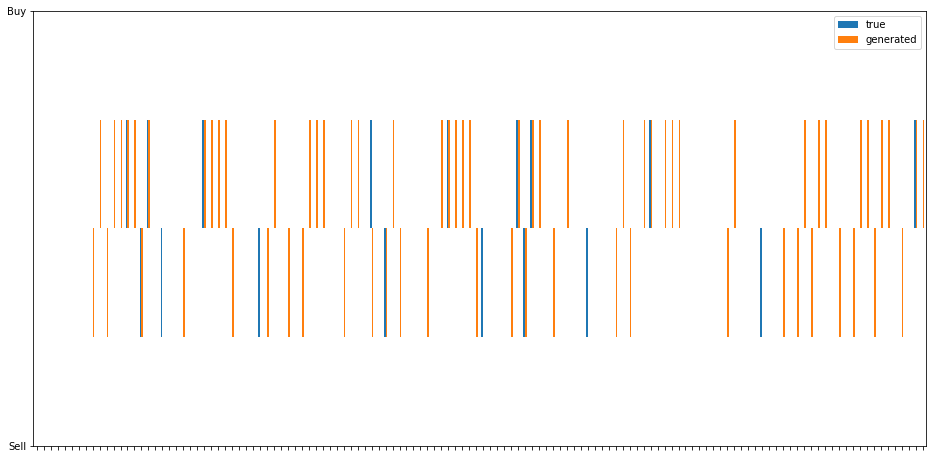

In [13]:
plot_signals(observed_signal, signal)

In [14]:
import microssembly
mssembly = Microssembly(architecture=4)
mssembly.run(best_code)

['bin-max [0] [14]',
 'bin-max [0] [13]',
 'max [1] [14]',
 'min [7] [15]',
 'inc [7]',
 'max [6] [12]',
 'bin-max [0] [15]',
 'max [2] [4]']

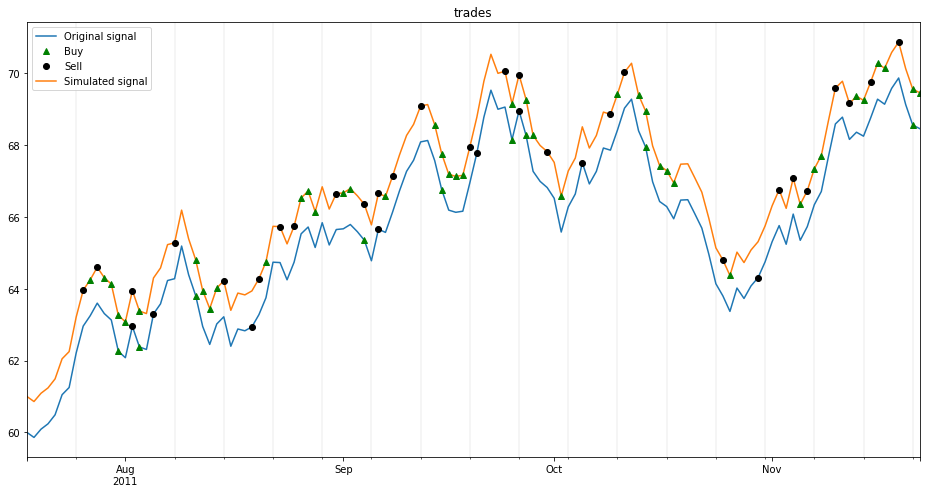

In [15]:
plot_trades(price, observed_signal, plt)
plot_trades(price + 1, signal, plt)
plt.legend(['Original signal', 'Buy', 'Sell', 'Simulated signal'], loc='best')

In [16]:
a = (np.sum(signal[observed_signal[observed_signal == 1].index] == 1)
     / len(observed_signal[observed_signal == 1]) + 1e-9)
b = (np.sum(signal[observed_signal[observed_signal == 0].index] == 0)
     / len(observed_signal[observed_signal == 0]) + 1e-9)
c = (np.sum(np.isnan(signal[observed_signal[observed_signal.isna()].index]))
     / len(observed_signal[observed_signal.isna()]) + 1e-9)

In [17]:
a, b, c, 3 / (1/a + 1/b + 1/c)

(0.8888888898888888, 0.375000001, 0.48648648748648654, 0.5130641341223927)